# Loading the datasets containing customer_info, their financial profile, and transactions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file_path = "customer_transc_data.xlsx"
df_cust = pd.read_excel(file_path, sheet_name = "customers")
df_credP = pd.read_excel(file_path, sheet_name = "credit_profiles")
df_trnsc = pd.read_excel(file_path, sheet_name = "transactions")

# Data Cleaning

## Customer table

In [2]:
print(df_cust.describe())
print(df_cust.head())

           cust_id          age  annual_income
count  1000.000000  1000.000000     950.000000
mean    500.500000    36.405000  139410.314737
std     288.819436    15.666155  112416.802007
min       1.000000     1.000000       2.000000
25%     250.750000    26.000000   47627.500000
50%     500.500000    32.000000  112218.500000
75%     750.250000    46.000000  193137.500000
max    1000.000000   135.000000  449346.000000
   cust_id            name  gender  age location      occupation  \
0        1   Manya Acharya  Female    2     City  Business Owner   
1        2   Anjali Pandey  Female   47     City      Consultant   
2        3  Aaryan Chauhan    Male   21     City      Freelancer   
3        4      Rudra Bali    Male   24    Rural      Freelancer   
4        5    Advait Malik    Male   48     City      Consultant   

   annual_income marital_status  
0       358211.0        Married  
1        65172.0         Single  
2        22378.0        Married  
3        33563.0        Married 

### Handling annual_income col

In [3]:
# print(df_cust.isnull().sum())
df_cust_null = df_cust[df_cust['annual_income'].isnull()]
print(df_cust_null.head())

     cust_id               name  gender  age location           occupation  \
14        15      Sanjana Malik  Female   25    Rural               Artist   
82        83  Reyansh Mukherjee    Male   27     City           Freelancer   
97        98         Virat Puri    Male   47   Suburb       Business Owner   
102      103         Aarav Shah    Male   32     City       Data Scientist   
155      156       Kiaan Saxena    Male   24     City  Fullstack Developer   

     annual_income marital_status  
14             NaN        Married  
82             NaN         Single  
97             NaN        Married  
102            NaN        Married  
155            NaN        Married  


In [4]:
occupation_wise_median_income = df_cust.groupby("occupation")["annual_income"].median()
print(occupation_wise_median_income)

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64


In [5]:
#filling the NaN values with the median value of the occupation group they belong to as dfifferent occupations have different earning range
df_cust['annual_income'] = df_cust.apply(
    lambda row : occupation_wise_median_income[row.occupation] if pd.isnull(row.annual_income) else row.annual_income, axis = 1)

df_cust.iloc[[14,1]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single


In [6]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

count      1000.000000
mean     138916.765500
std      110969.408643
min           2.000000
25%       48229.500000
50%      113416.000000
75%      192614.000000
max      449346.000000
Name: annual_income, dtype: float64


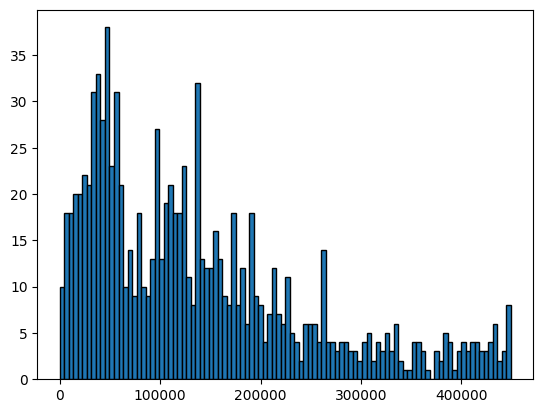

In [7]:
print(df_cust['annual_income'].describe())
plt.hist(df_cust['annual_income'], bins = 100, edgecolor = 'black')
plt.show()

Since annual income cannot be less than 100 USD and here the min is 2USD, therefore all values below 100 USD are outliers

In [8]:
df_cust[df_cust.annual_income <= 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [9]:
#filling outlier values of annual_income col with the median of the occupation group as above
df_cust['annual_income'] = df_cust.apply(
    lambda row : occupation_wise_median_income[row.occupation] if (row.annual_income < 100) else row.annual_income, axis = 1)

df_cust.iloc[[1,31]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married


### Handling age col

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64


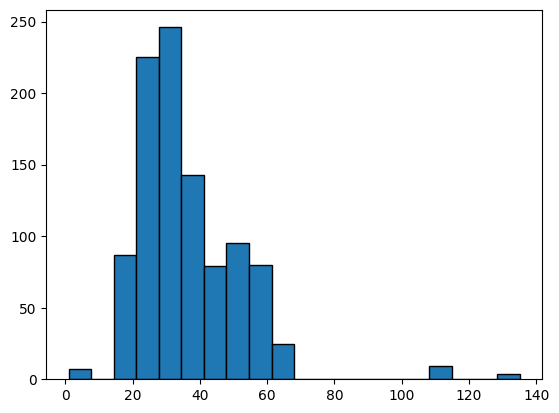

In [10]:
print(df_cust.age.describe())
plt.hist(df_cust.age, bins = 20, edgecolor = 'black')
plt.show()

Age should be between 15 to 80 years so ages < 15 and ages > 80 are outliers

In [11]:
df_cust[(df_cust.age < 15) | (df_cust.age > 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [12]:
occupation_wise_median_age = df_cust.groupby('occupation')['age'].median()
print(occupation_wise_median_age)

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64


In [13]:
#filling outlier values of age col with the median of the occupation group as above
df_cust['age'] = df_cust.apply(
    lambda row : occupation_wise_median_age[row.occupation] if (row.age < 15 or row.age > 80) else row.age, axis = 1)

print(df_cust[(df_cust.age < 15) | (df_cust.age > 80)])

Empty DataFrame
Columns: [cust_id, name, gender, age, location, occupation, annual_income, marital_status]
Index: []


### Customer table all catergorical columns vs average annual income trends

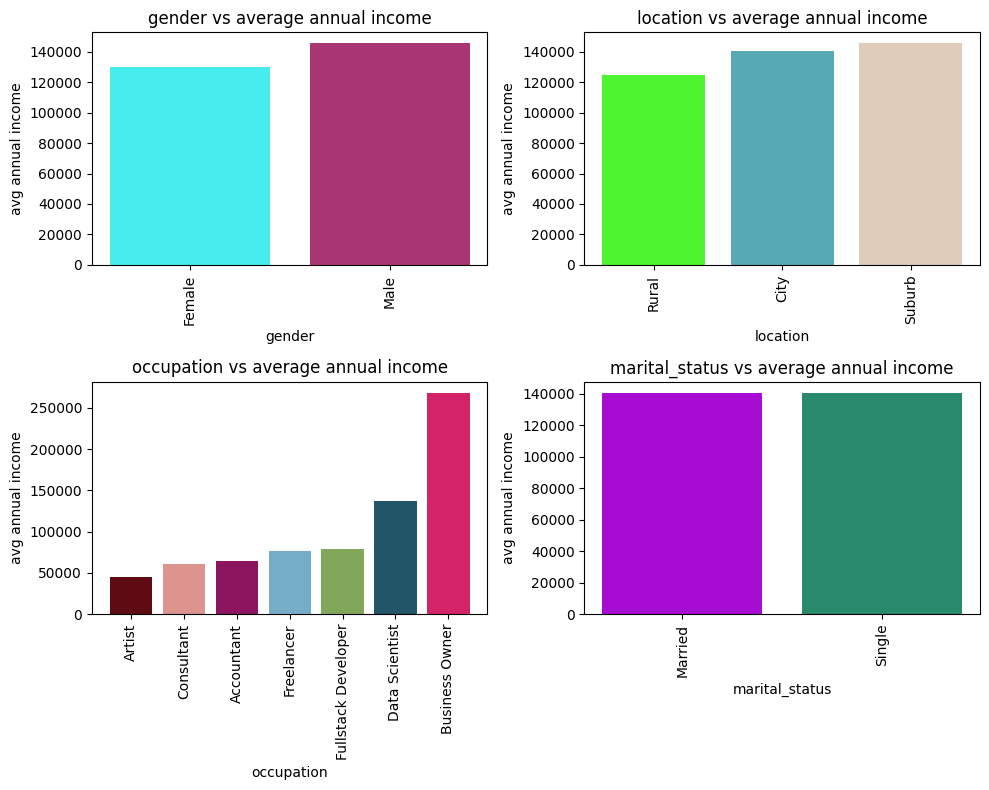

In [14]:
plt.figure(figsize=(10, 8))

categorical_columns = ['gender', 'location', 'occupation', 'marital_status']
matrix_pos = 1
for category in categorical_columns:
    income_by_category = df_cust.groupby(category)['annual_income'].mean().sort_values()
    plt.subplot(2, 2, matrix_pos)
    random_colors = np.random.rand(len(list(income_by_category.index)), 3)
    plt.bar(income_by_category.index, income_by_category.values, color = random_colors)
    plt.xlabel(category)
    plt.ylabel("avg annual income")
    plt.xticks(rotation = 90)
    plt.title(f"{category} vs average annual income")
    matrix_pos += 1

plt.tight_layout()
plt.show()

### Age Distribution

In [15]:
df_cust["age"].describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

In [16]:
age_bins = [17, 25, 48, 65]
age_labels = ['18-25', '26-48', '49-65']
df_cust['AgeCategory'] = pd.cut(df_cust['age'], bins=age_bins, labels=age_labels)
print(df_cust.head())

   cust_id            name  gender   age location      occupation  \
0        1   Manya Acharya  Female  51.0     City  Business Owner   
1        2   Anjali Pandey  Female  47.0     City      Consultant   
2        3  Aaryan Chauhan    Male  21.0     City      Freelancer   
3        4      Rudra Bali    Male  24.0    Rural      Freelancer   
4        5    Advait Malik    Male  48.0     City      Consultant   

   annual_income marital_status AgeCategory  
0       358211.0        Married       49-65  
1        65172.0         Single       26-48  
2        22378.0        Married       18-25  
3        33563.0        Married       18-25  
4        39406.0        Married       26-48  


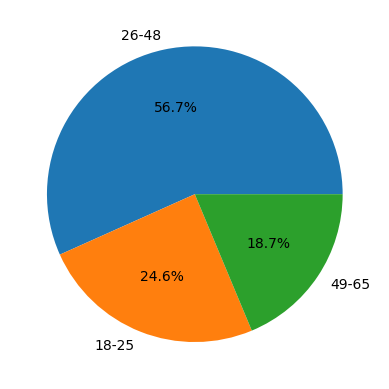

In [17]:
age_dist = df_cust['AgeCategory'].value_counts()
age_category = list(age_dist.index)
age_cat_freq = list(age_dist.values)
plt.pie(age_cat_freq, labels = age_category, autopct = "%.1f%%")
plt.show()

### Distribution of customers by location and gender

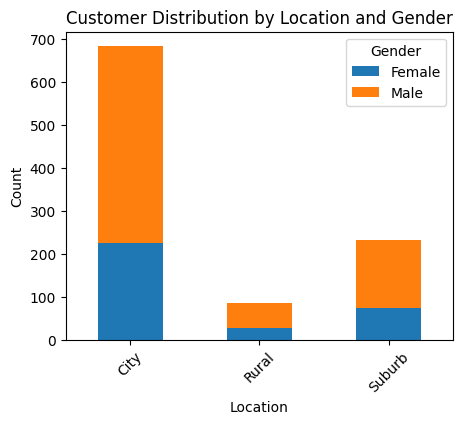

In [18]:
customer_location_gender = df_cust.groupby(['location', 'gender']).size().unstack()
customer_location_gender.plot(kind='bar', stacked=True, figsize=(5, 4))

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Customer Distribution by Location and Gender')

# Show the bar chart
plt.legend(title='Gender')  # Add a legend

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

## Credit Profiles Table

In [19]:
df_credP.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 4
outstanding_debt                   4
credit_inquiries_last_6_months     4
credit_limit                      69
dtype: int64

In [20]:
df_credP.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [21]:
df_credP['cust_id'].nunique()

1000

In [22]:
df_credP_duplicates = df_credP[df_credP.duplicated('cust_id', keep=False)]
print(df_credP_duplicates)

     cust_id  credit_score  credit_utilisation  outstanding_debt  \
516      517           308                 NaN               NaN   
517      517           308            0.113860              33.0   
569      569           344                 NaN               NaN   
570      569           344            0.112599              37.0   
607      606           734                 NaN               NaN   
608      606           734            0.193418            4392.0   
664      662           442                 NaN               NaN   
665      662           442            0.856039             266.0   

     credit_inquiries_last_6_months  credit_limit  
516                             NaN           NaN  
517                             3.0         500.0  
569                             NaN           NaN  
570                             0.0         500.0  
607                             NaN           NaN  
608                             1.0       40000.0  
664                    

In [23]:
#removing duplicates from the table
df_credP.drop_duplicates('cust_id', keep='last', inplace=True)

df_credP.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19235.561497
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1250.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [24]:
df_credP.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

### filling Na values in credit_limit column

In [25]:
df_credP[df_credP['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [26]:
df_credP['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

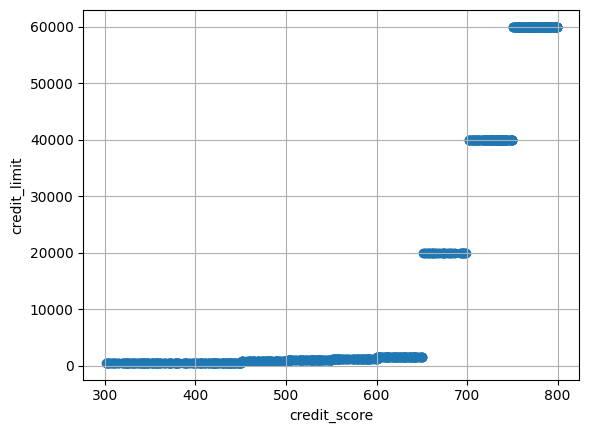

In [27]:
plt.scatter(df_credP['credit_score'], df_credP['credit_limit'])
plt.xlabel("credit_score")
plt.ylabel("credit_limit")
plt.grid()
plt.show()

Here we can see clear relationship between credit score and credit limit. Where there are levels for example, upto 650 score is getting a very minor credit limit (<1000$) where as a score between 650 to 700 is getting around 20000. Score between 700 to 750 is getting around 40K etc.

In [28]:
#creating custom bins for credit score to fill NaN values in the credit_limit col based on credit score
custom_bins = [300, 450, 500, 550, 600, 650, 700, 750, 800]
custom_labels = [f"{start}-{end}" for start, end in zip(custom_bins, custom_bins[1:])]

# Include the upper bound of the last bin
# custom_labels.append(f"{custom_bins[-1]}+")


df_credP['credit_score_range'] = pd.cut(df_credP['credit_score'], bins=custom_bins, labels=custom_labels)
# df_credP['credit_score_range'].dtype
df_credP.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-750
1,2,587,0.107928,161644.0,2.0,1250.0,550-600
2,3,544,0.854807,513.0,4.0,1000.0,500-550
3,4,504,0.336938,224.0,2.0,1000.0,500-550
4,5,708,0.586151,18090.0,2.0,40000.0,700-750


In [29]:
#replacing NaN values with mode of the credit_score range they fall in
credit_score_range_modes = df_credP.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0])
print(credit_score_range_modes)

credit_score_range
300-450      500.0
450-500      750.0
500-550     1000.0
550-600     1250.0
600-650     1500.0
650-700    20000.0
700-750    40000.0
750-800    60000.0
Name: credit_limit, dtype: float64


/var/folders/3g/sw8qgq490rq93343015t4th80000gn/T/ipykernel_25144/179763076.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_score_range_modes = df_credP.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0])


In [30]:
#taking care of one corner case as dataset contains credit_score 300
df_credP.at[680, 'credit_score_range'] = '300-450'

df_credP['credit_limit'] = df_credP.apply(
    lambda row : credit_score_range_modes[row['credit_score_range']] if pd.isnull(row.credit_limit) else row.credit_limit, axis = 1)
df_credP.iloc[[10,35,680]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
10,11,679,0.557450,9187.0,2.0,20000.0,650-700
35,36,790,0.112535,4261.0,1.0,60000.0,750-800
684,681,377,0.340843,139.0,2.0,500.0,300-450


In [31]:
df_credP.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
dtype: int64

In [32]:
df_credP.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.629112
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


### Analyzing outstanding_deb for outliers as max(outstanding_deb) > max(credit_limit)

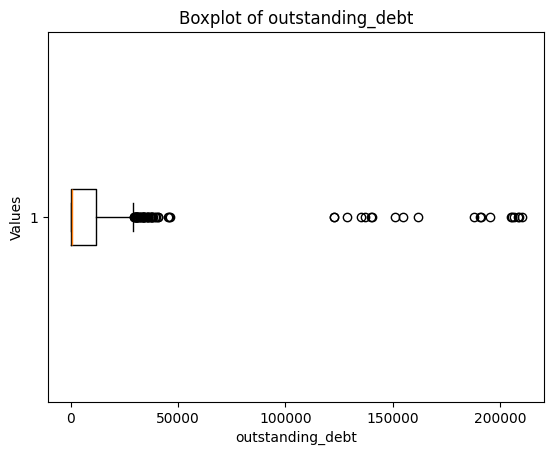

In [33]:
# Create a boxplot for the 'Values' column
plt.boxplot(df_credP['outstanding_debt'], vert=False)

# Set labels and title
plt.xlabel('outstanding_debt')
plt.ylabel('Values')
plt.title('Boxplot of outstanding_debt')

# Show the plot
plt.show()

In [34]:
df_credP[df_credP.outstanding_debt > df_credP.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
1,2,587,0.107928,161644.0,2.0,1250.0,550-600
19,20,647,0.439132,205014.0,3.0,1500.0,600-650
25,26,758,0.250811,190838.0,2.0,60000.0,750-800
38,39,734,0.573023,122758.0,3.0,40000.0,700-750
93,94,737,0.739948,137058.0,2.0,40000.0,700-750
204,205,303,0.364360,187849.0,0.0,500.0,300-450
271,272,703,0.446886,154568.0,1.0,40000.0,700-750
301,302,722,0.608076,122402.0,4.0,40000.0,700-750
330,331,799,0.363420,208898.0,4.0,60000.0,750-800
350,351,320,0.285081,150860.0,0.0,500.0,300-450


In [35]:
df_credP.loc[df_credP.outstanding_debt > df_credP.credit_limit, 'outstanding_debt'] = df_credP['credit_limit']
df_credP.iloc[[1,19,25]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
1,2,587,0.107928,1250.0,2.0,1250.0,550-600
19,20,647,0.439132,1500.0,3.0,1500.0,600-650
25,26,758,0.250811,60000.0,2.0,60000.0,750-800


### Correlation between all numerical columns in credP and customers table

In [36]:
merged_df = pd.merge(df_cust, df_credP, on='cust_id', how='inner')
merged_df.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,AgeCategory,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-750
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-600
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-550
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-550
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-750


In [37]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income','age']
correlation_matrix = merged_df[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847951,0.575751,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080504,-0.086368,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444301
credit_limit,0.847951,-0.080504,0.810581,1.000000,0.684780,0.510980
annual_income,0.575751,-0.086368,0.555661,0.684780,1.000000,0.619037
age,0.444917,-0.027713,0.444301,0.510980,0.619037,1.000000


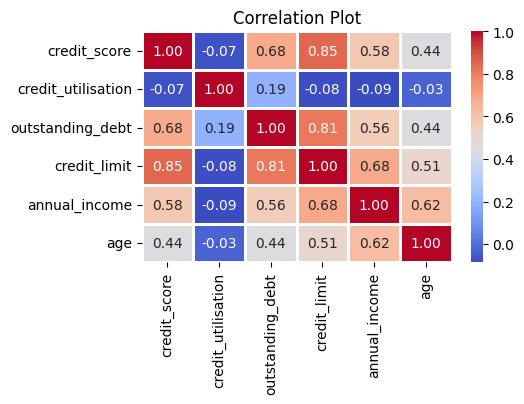

In [38]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Plot')
plt.show()

## Transactions Table

In [39]:
df_trnsc.describe()

,tran_id,cust_id,tran_date,tran_amount
count,500000.000000,500000.000000,500000,500000.00000
mean,250000.500000,501.400428,2023-05-04 12:09:05.875200256,3225.20733
min,1.000000,1.000000,2023-01-01 00:00:00,0.00000
25%,125000.750000,252.000000,2023-03-03 00:00:00,64.00000
50%,250000.500000,502.000000,2023-05-04 00:00:00,141.00000
75%,375000.250000,752.000000,2023-07-06 00:00:00,397.00000
max,500000.000000,1000.000000,2023-09-05 00:00:00,69999.00000
std,144337.711635,288.641924,NaN,13098.74276


In [40]:
df_trnsc.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [41]:
mode_res = df_trnsc.platform.mode()
print(mode_res)

0    Amazon
Name: platform, dtype: object


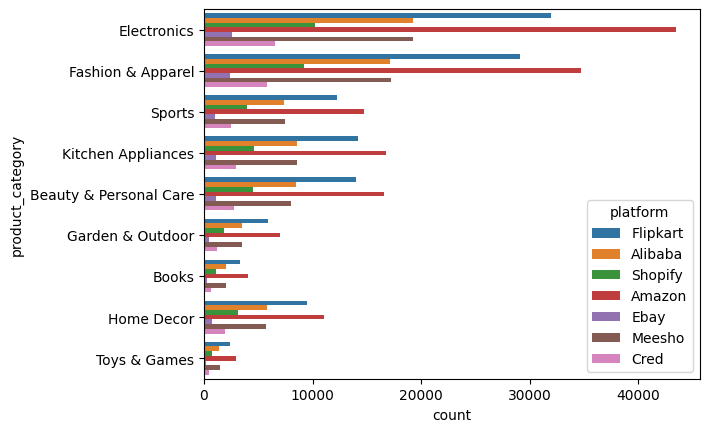

In [42]:
#product category wise dominating platform
sns.countplot(df_trnsc, y='product_category', hue='platform')
plt.show()

As we can see amazon is leading in all product categories for replacing all null values in platform column with amazon

In [43]:
df_trnsc[df_trnsc['platform'].isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [44]:
df_trnsc['platform'] = df_trnsc['platform'].fillna(mode_res[0])
print(df_trnsc.isnull().sum())
df_trnsc.iloc[[355,418]]

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,Amazon,Electronics,Net Banking
418,419,383,2023-01-01,338,Amazon,Electronics,Credit Card


In [45]:
df_trnsc.describe()

,tran_id,cust_id,tran_date,tran_amount
count,500000.000000,500000.000000,500000,500000.00000
mean,250000.500000,501.400428,2023-05-04 12:09:05.875200256,3225.20733
min,1.000000,1.000000,2023-01-01 00:00:00,0.00000
25%,125000.750000,252.000000,2023-03-03 00:00:00,64.00000
50%,250000.500000,502.000000,2023-05-04 00:00:00,141.00000
75%,375000.250000,752.000000,2023-07-06 00:00:00,397.00000
max,500000.000000,1000.000000,2023-09-05 00:00:00,69999.00000
std,144337.711635,288.641924,NaN,13098.74276


We can see transactions with 0 amount. These seem to be invalid

In [46]:
df_trnsc_zero = df_trnsc[df_trnsc.tran_amount == 0]
print(df_trnsc_zero)

        tran_id  cust_id  tran_date  tran_amount platform product_category  \
120         121      440 2023-01-01            0   Amazon      Electronics   
141         142      839 2023-01-01            0   Amazon      Electronics   
517         518      147 2023-01-01            0   Amazon      Electronics   
533         534      891 2023-01-01            0   Amazon      Electronics   
586         587      108 2023-01-01            0   Amazon      Electronics   
...         ...      ...        ...          ...      ...              ...   
499326   499327      695 2023-09-05            0   Amazon      Electronics   
499494   499495      295 2023-09-05            0   Amazon      Electronics   
499708   499709      141 2023-09-05            0   Amazon      Electronics   
499928   499929        4 2023-09-05            0   Amazon      Electronics   
499972   499973      224 2023-09-05            0   Amazon      Electronics   

       payment_type  
120     Credit Card  
141     Credit Card

In [47]:
df_trnsc_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

It appears that when platform=Amazon, product_category=Eletronics and payment_type=Credit Card, at that time we get all these zero transactions. We need to find other transactions in this group and find its median to replace these zero values. We are not using mean because we can see some outliers as well in this column

In [48]:
df_trnsc_1 = df_trnsc[(df_trnsc.platform=='Amazon')&(df_trnsc.product_category=="Electronics")&(df_trnsc.payment_type=="Credit Card")]
df_trnsc_1.shape

(15637, 7)

In [49]:
df_trnsc_1[df_trnsc_1.tran_amount>0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [50]:
median_to_replace = df_trnsc_1[df_trnsc_1.tran_amount>0].tran_amount.median()
median_to_replace

554.0

In [51]:
df_trnsc['tran_amount'].replace(0,median_to_replace, inplace=True)
print(df_trnsc[df_trnsc.tran_amount==0])

Empty DataFrame
Columns: [tran_id, cust_id, tran_date, tran_amount, platform, product_category, payment_type]
Index: []


no zero values are left in tran_amount column

In [52]:
df_trnsc.tran_amount.describe()

count    500000.000000
mean       3230.452602
std       13097.561071
min           2.000000
25%          66.000000
50%         146.000000
75%         413.000000
max       69999.000000
Name: tran_amount, dtype: float64

In [53]:
df_trnsc[df_trnsc['tran_amount']<1000].describe()

,tran_id,cust_id,tran_date,tran_amount
count,475000.000000,475000.000000,475000,475000.000000
mean,250041.699922,501.375499,2023-05-04 12:38:30.063158272,240.667608
min,1.000000,1.000000,2023-01-01 00:00:00,2.000000
25%,125126.750000,252.000000,2023-03-04 00:00:00,63.000000
50%,250100.500000,502.000000,2023-05-05 00:00:00,131.000000
75%,374928.250000,751.000000,2023-07-06 00:00:00,348.000000
max,500000.000000,1000.000000,2023-09-05 00:00:00,999.000000
std,144285.259913,288.606185,NaN,244.487110


In [54]:
Q1, Q3 = df_trnsc['tran_amount'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 2 * IQR
upper = Q3 + 2 * IQR

lower, upper

(-628.0, 1107.0)

In [55]:
print(df_trnsc[df_trnsc.tran_amount<upper].tran_amount.max()) #transactions less than upper cap
print(df_trnsc[df_trnsc.tran_amount>upper].tran_amount.max()) #transactions greater than upper cap

999
69999


In [56]:
df_trnsc[df_trnsc.tran_amount>=upper]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [57]:
df_trnsc_normal = df_trnsc[df_trnsc.tran_amount<upper]
df_trnsc_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [58]:
tran_mean_per_category = df_trnsc_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [59]:
#replacing outlier values greater than upper with mean of their product_category
df_trnsc['tran_amount'] = df_trnsc.apply(
    lambda row : tran_mean_per_category[row.product_category] if (row.tran_amount >= upper) else row.tran_amount, axis = 1)

df_trnsc.iloc[[26,49]]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay


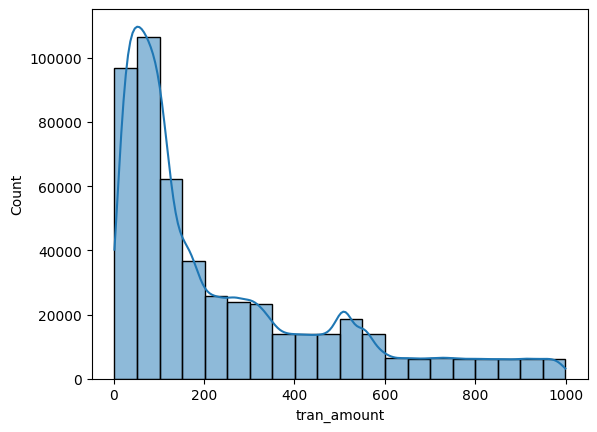

In [60]:
sns.histplot(x='tran_amount', data=df_trnsc, bins=20, kde=True)
plt.show()

Above shows the histogram of transactions after the removal of outliers. We can see that distribution is right skewed. Transaction amount now is less than 1000

# Data Visualization

## Payment Type Distribution

In [61]:
df_trnsc.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe


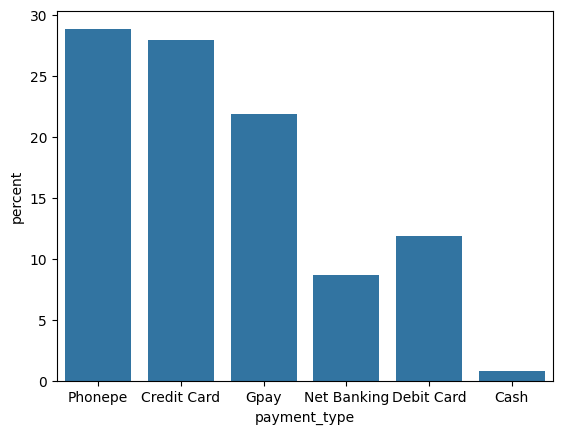

In [62]:
sns.countplot(x=df_trnsc.payment_type, stat='percent')
plt.show()

### Distribution of payment types across age groups

In [63]:
df_merged_2 = merged_df.merge(df_trnsc, on='cust_id', how='inner')
df_merged_2.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,AgeCategory,credit_score,...,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-750,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-750,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-750,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay


In [64]:
df_merged_2.shape

(500000, 21)

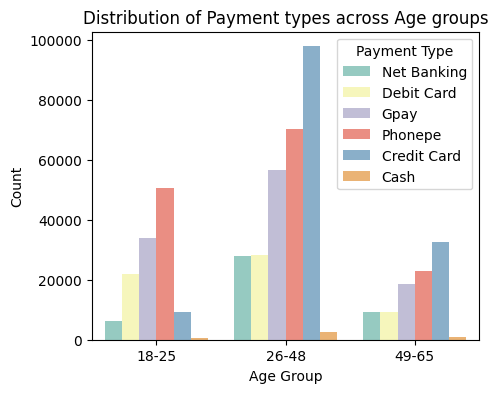

In [65]:
plt.figure(figsize=(5, 4))
sns.countplot(x='AgeCategory', hue='payment_type', data=df_merged_2, palette='Set3')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

plt.show()

From above analysis, we can see that age group 18-25 has less exposure to credit cards compared to other groups

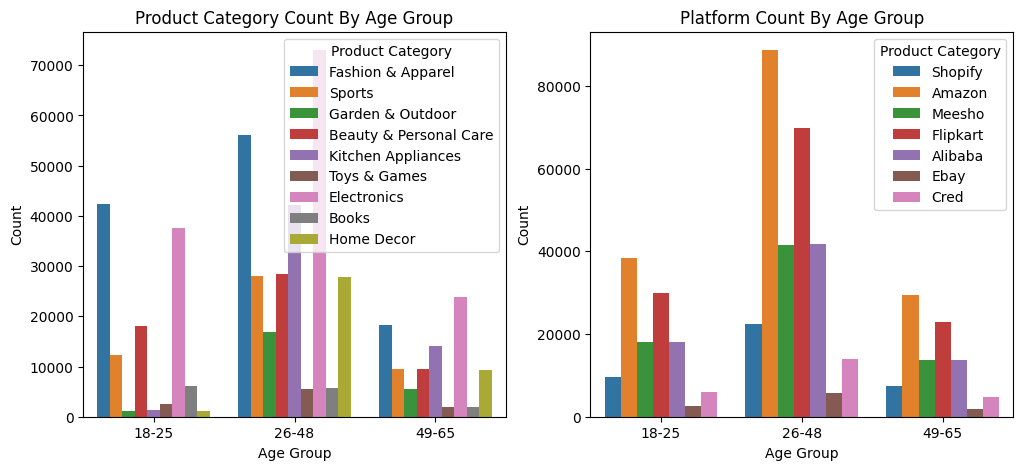

In [66]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='AgeCategory', hue="product_category", data=df_merged_2, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category", loc='upper right')

sns.countplot(x='AgeCategory', hue="platform", data=df_merged_2, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Product Category", loc='upper right')

plt.show()

### Observations:

1. Top 3 purchasing categories of customers in age group (18 -25) : Electronics, Fashion & Apparel, Beauty & personal care
1. Top platforms : Amazon, Flipkart, Alibaba

## Average Transaction Amount

/var/folders/3g/sw8qgq490rq93343015t4th80000gn/T/ipykernel_25144/3989051986.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/3g/sw8qgq490rq93343015t4th80000gn/T/ipykernel_25144/3989051986.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/3g/sw8qgq490rq93343015t4th80000gn/T/ipykernel_25144/3989051986.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
/var/folders/3g/sw8qgq490rq93343015t4th80000gn/T/ipykernel_25144/3989051986.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. a

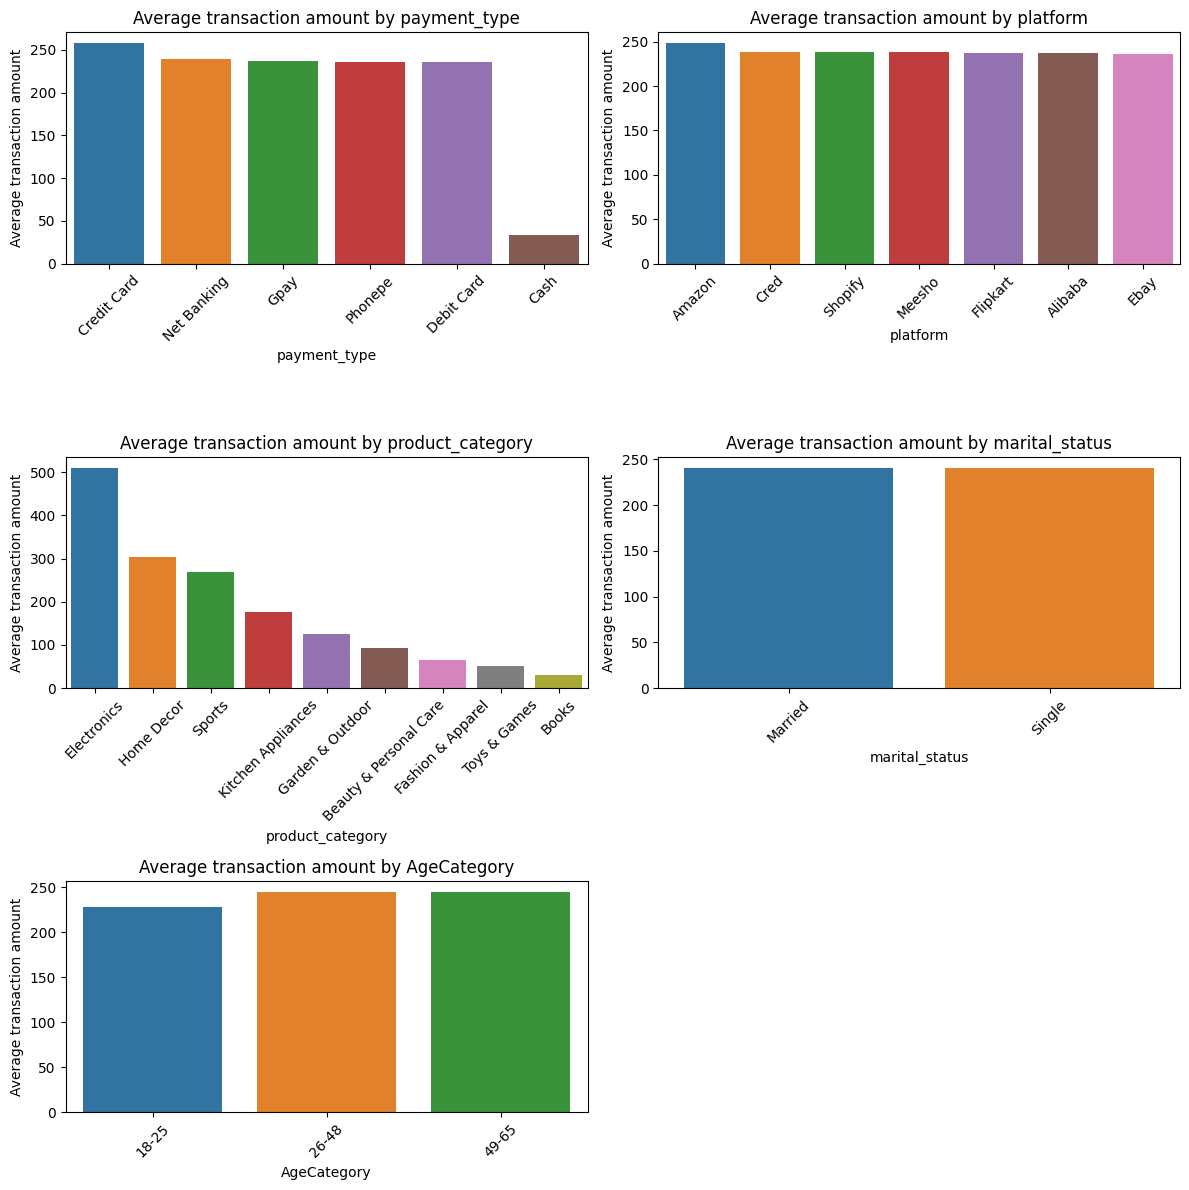

In [67]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'AgeCategory']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, errorbar=None, ax=axes[i], palette='tab10', hue = cat_col, legend=False)
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [68]:
df_trnsc.describe()

,tran_id,cust_id,tran_date,tran_amount
count,500000.000000,500000.000000,500000,500000.000000
mean,250000.500000,501.400428,2023-05-04 12:09:05.875200256,240.672998
min,1.000000,1.000000,2023-01-01 00:00:00,2.000000
25%,125000.750000,252.000000,2023-03-03 00:00:00,64.553463
50%,250000.500000,502.000000,2023-05-04 00:00:00,133.000000
75%,375000.250000,752.000000,2023-07-06 00:00:00,349.000000
max,500000.000000,1000.000000,2023-09-05 00:00:00,999.000000
std,144337.711635,288.641924,NaN,241.696597


### Further Analysis On Age Group

In [69]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = merged_df.groupby('AgeCategory')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

/var/folders/3g/sw8qgq490rq93343015t4th80000gn/T/ipykernel_25144/3280630020.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_metrics = merged_df.groupby('AgeCategory')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()


,AgeCategory,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.405644,597.569665
2,49-65,260165.925134,41699.197861,701.524064


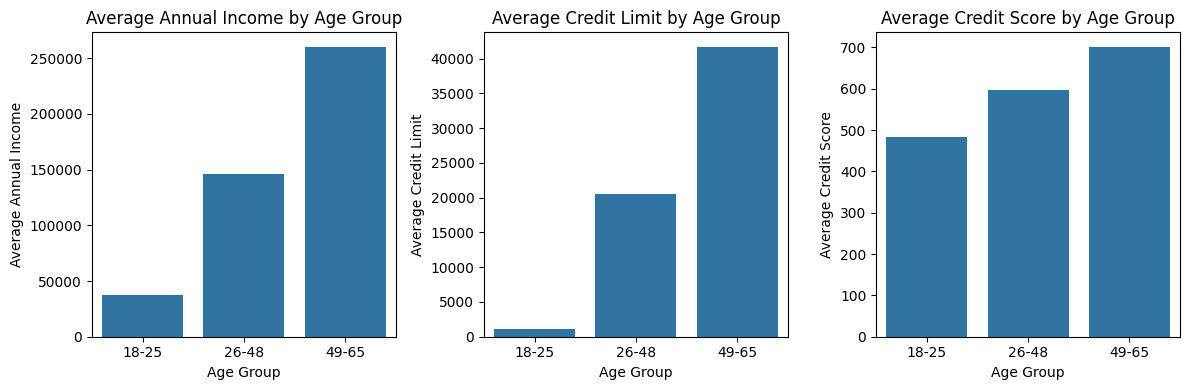

In [70]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='AgeCategory', y='annual_income', data=age_group_metrics, ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='AgeCategory', y='credit_limit', data=age_group_metrics, ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='AgeCategory', y='credit_score', data=age_group_metrics, ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Finalize Target Market For a Trial Credit Card Launch

## Targeting Untapped market

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care